<center>
    <h1><b>NHẬP MÔN HỌC MÁY - CQ2017</b></h1>
    <h2>ĐỒ ÁN CUỐI KỲ</h2>
    <h2>Nhận diện chữ viết tay với SVM</h2>
    <h3>Giảng viên hướng dẫn: Trần Trung Kiên</h3>
    <h3>Trợ giảng: Phạm Trọng Nghĩa - Phan Thị Phương Uyên</h3>
    <hr width='20%'>
    <h3>Nhóm sinh viên:</h3>
    <div style="display: inline-block; text-align: left;">
        1712787 - Nguyễn Văn Thìn<br>
        1712920 - Nguyễn Minh Vũ<br>
        1712921 - Nguyễn Thái Vũ<br>
    </div>
    <hr width='20%'>
    <h1><b>RBF Kernel</b></h1>
    <h2>Phân tích kết quả</h2>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [2]:
def bar_line_chart(df, C):
    '''
    Plot bar chart and line chart on the same figure
        - bar chart: shows the fit times of each model
        - line chart: shows the changing of training, validating and testing errors through different gamma
    -----
    Params:
        - df: the result DataFrame of each C
        - C: the param C
    '''
    x = list(range(df.shape[0]))
    xlabels = df['gamma'].values.ravel()
    col_width = .5
    line_width = 3
    font_size = 'xx-large'
    y_min = max(0, df['te_err'].min() - (df['te_err'].max() - df['te_err'].min())) 
    y_max = min(100, (df['te_err'].max() + (df['te_err'].max() - df['te_err'].min())) * 100)
    fig, ax1= plt.subplots(figsize=(6.5, 3.5))

    b1 = ax1.bar(x, df['fit_time'].values.ravel(), col_width, tick_label=df['gamma'].values.ravel(), label='fit time')
    ax1.set_xlabel('gamma', fontsize=font_size)
    ax1.set_ylabel('fit time (seconds)', fontsize=font_size)
    ax1.grid(False)

    ax2 = ax1.twinx()
    l1, = ax2.plot(df['tr_err'].values.ravel() * 100, linewidth=line_width, color='r', label='tr_err')
    ax2.scatter(x, df['tr_err'].values.ravel() * 100, color='r')
    l2, = ax2.plot(df['va_err'].values.ravel() * 100, linewidth=line_width, color='g', label='va_err')
    ax2.scatter(x, df['va_err'].values.ravel() * 100, color='g')
    l3, = ax2.plot(df['te_err'].values.ravel() * 100, linewidth=line_width, color='y', label='te_err')
    ax2.scatter(x, df['te_err'].values.ravel() * 100, color='y')
    ax2.set_ylabel('error (%)', fontsize=font_size)
    ax2.set_ylim(ymin=y_min, ymax=y_max)
    ax2.grid(False)
    
    #plt.legend(handles=[b1, l1, l2, l3], bbox_to_anchor=(1.15, 1.), loc='upper left', fontsize='x-large')
    plt.title('So sánh các mô hình có C = ' + str(C), fontsize=font_size)
    fig.tight_layout()
    plt.savefig(fname='res/rbf_' + str(C) + '_ovo.png', dpi=120)
    plt.show()

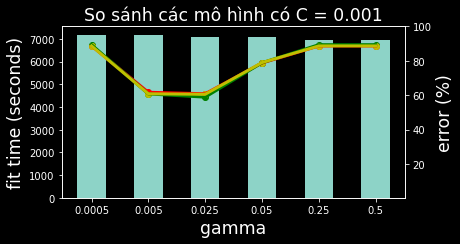

In [3]:
C=0.001
df = pd.read_csv('res/rbf_0.001_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

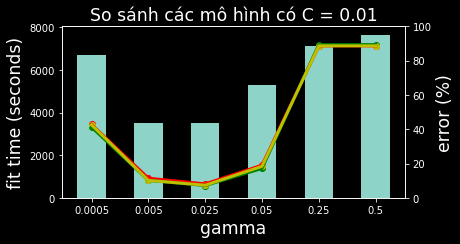

In [4]:
C = 0.01
df = pd.read_csv('res/rbf_0.01_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

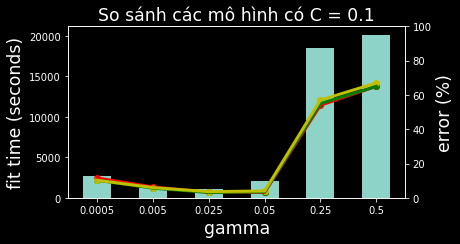

In [5]:
C=0.1
df = pd.read_csv('res/rbf_0.1_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

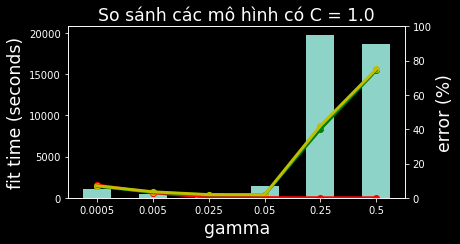

In [6]:
C=1.0
df = pd.read_csv('res/rbf_1.0_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

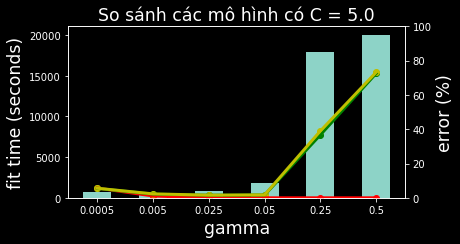

In [7]:
C=5.0
df = pd.read_csv('res/rbf_5.0_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

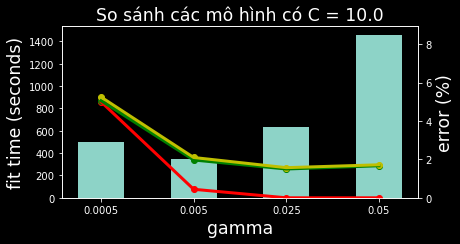

In [8]:
C=10.0
df = pd.read_csv('res/rbf_10.0_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

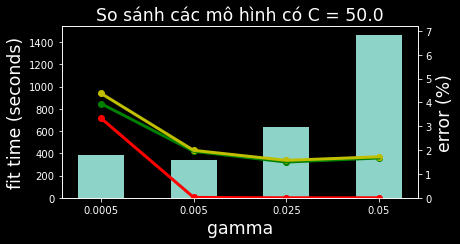

In [9]:
C=50.0
df = pd.read_csv('res/rbf_50.0_ovo.csv')
df['fit_time'] = df['fit_time'].astype(int)
bar_line_chart(df, C)

In [10]:
C = [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0]
def get_best(C=C):
    '''
    Get a DataFrame contains details of the best models for all the C
    Params:
    -----
        C: the C param
    '''
    best_tr_data = {'C': C,
                'gamma': [],
                'fit_time': [],
                'tr_err': [],
                'va_err': [],
                'te_err': []}
    best_te_data = {'C': C,
                'gamma': [],
                'fit_time': [],
                'tr_err': [],
                'va_err': [],
                'te_err': []}
    for c in C:
        name = 'rbf_' + str(c) + '_ovo'
        path = 'res/' + name + '.csv'
        df = pd.read_csv(path)
        best_tr_idx = df[df['best_tr'] == True].index.values
        best_te_idx = df[df['best_te'] == True].index.values
        best_tr_data['gamma'].append(df.loc[best_tr_idx, 'gamma'].values[0])
        best_tr_data['fit_time'].append(df.loc[best_tr_idx, 'fit_time'].values[0])
        best_tr_data['tr_err'].append(df.loc[best_tr_idx, 'tr_err'].values[0])
        best_tr_data['va_err'].append(df.loc[best_tr_idx, 'va_err'].values[0])
        best_tr_data['te_err'].append(df.loc[best_tr_idx, 'te_err'].values[0])
        
        best_te_data['gamma'].append(df.loc[best_te_idx, 'gamma'].values[0])
        best_te_data['fit_time'].append(df.loc[best_te_idx, 'fit_time'].values[0])
        best_te_data['tr_err'].append(df.loc[best_te_idx, 'tr_err'].values[0])
        best_te_data['va_err'].append(df.loc[best_te_idx, 'va_err'].values[0])
        best_te_data['te_err'].append(df.loc[best_te_idx, 'te_err'].values[0])
    
    df_best_tr = pd.DataFrame(data=best_tr_data).set_index(['C'])
    df_best_te = pd.DataFrame(data=best_te_data).set_index(['C'])
    return df_best_tr, df_best_te

In [11]:
def best_bar_line_chart(df, name, fname):
    '''
    Plot bar chart and line chart on the same figure
        - bar chart: shows the fit times of each best models
        - line chart: shows the changing of gamma, training, validating and testing errors through different C
    -----
    Params:
        - df: the result DataFrame of each C
        - name: title of the figure
        - fname: the file name to save the figure as
    '''
    x = list(range(df.shape[0]))
    xlabels = df.index.values.ravel()
    col_width = .5
    line_width = 3
    font_size = 'xx-large'
    y_min = max(0, df['te_err'].min() - (df['te_err'].max() - df['te_err'].min())) 
    y_max = min(100, (df['te_err'].max() + (df['te_err'].max() - df['te_err'].min())) * 100)
    fig, ax1= plt.subplots(figsize=(7, 3.5))
    
    b1 = ax1.bar(x, df['fit_time'].values.ravel(), col_width, tick_label=df.index.values.ravel(), label='fit time')
    ax1.set_xlabel('C', fontsize=font_size)
    ax1.set_ylabel('fit time (seconds)', fontsize=font_size)
    ax1.grid(False)

    ax2 = ax1.twinx()
    l0, = ax2.plot(df['gamma'].values.ravel() * 100, linewidth=line_width, color='w', label='gamma')
    ax2.scatter(x, df['gamma'].values.ravel() * 100, color='w')
    l1, = ax2.plot(df['tr_err'].values.ravel() * 100, linewidth=line_width, color='r', label='tr_err')
    ax2.scatter(x, df['tr_err'].values.ravel() * 100, color='r')
    l2, = ax2.plot(df['va_err'].values.ravel() * 100, linewidth=line_width, color='g', label='va_err')
    ax2.scatter(x, df['va_err'].values.ravel() * 100, color='g')
    l3, = ax2.plot(df['te_err'].values.ravel() * 100, linewidth=line_width, color='y', label='te_err')
    ax2.scatter(x, df['te_err'].values.ravel() * 100, color='y')
    ax2.set_ylabel('error (%) and gamma', fontsize=font_size)
    ax2.set_ylim(ymin=y_min, ymax=60)
    ax2.grid(False)
    
    #plt.legend(handles=[b1, l0, l1, l2, l3], bbox_to_anchor=(1.15, 1.), loc='upper left', fontsize='x-large')
    plt.title(name, fontsize=font_size)
    fig.tight_layout()
    plt.savefig(fname='res/' + fname, dpi=120)
    plt.show()

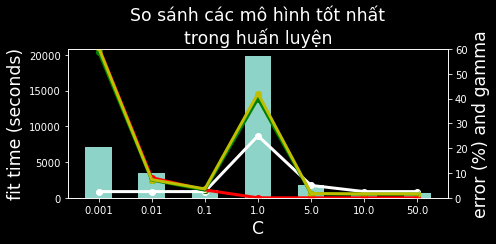

C,0.001,0.010,0.100,1.000,5.000,10.000,50.000
gamma,0.02500,0.0250,0.0250,0.2500,0.0500,0.0250,0.0250
tr_err,0.60828,0.0813,0.0317,0.0000,0.0000,0.0000,0.0000
te_err,0.60540,0.0733,0.0358,0.4204,0.0172,0.0157,0.0157


In [12]:
df_best_tr, df_best_te = get_best()
best_bar_line_chart(df_best_tr, 'So sánh các mô hình tốt nhất\ntrong huấn luyện', 'rbf_ovo_best_tr.png')
df_best_tr[['gamma', 'tr_err', 'te_err']].T

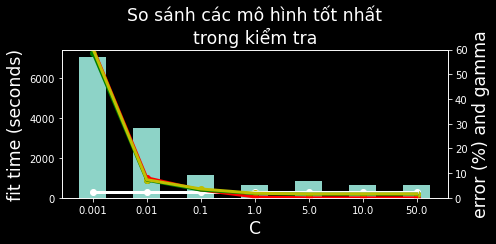

C,0.001,0.010,0.100,1.000,5.000,10.000,50.000
gamma,0.02500,0.0250,0.0250,0.0250,0.02500,0.0250,0.0250
tr_err,0.60828,0.0813,0.0317,0.0036,0.00002,0.0000,0.0000
te_err,0.60540,0.0733,0.0358,0.0184,0.01540,0.0157,0.0157


In [13]:
best_bar_line_chart(df_best_te, 'So sánh các mô hình tốt nhất\ntrong kiểm tra', 'rbf_ovo_best_te.png')
df_best_te[['gamma', 'tr_err', 'te_err']].T